# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [2]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
wine = pd.read_csv('winequality_edited.csv')
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Mod_High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Mod_High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.

In [11]:
# Use query to select each group and get its mean quality
med = wine['alcohol'].median()
low = wine.query('{}<= {}'.format('alcohol',med))
high = wine.query('{} > {}'.format('alcohol',med))
low_mean= low['quality'].mean()
high_mean = high['quality'].mean()

Text(0, 0.5, 'mean quality')

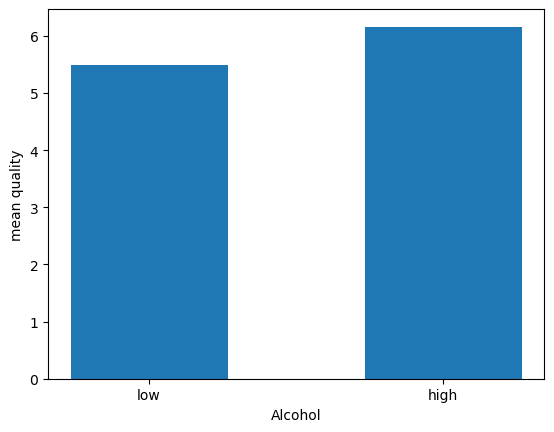

In [16]:
# Create a bar chart with proper labels
plt.bar([0,1.5],[low_mean,high_mean],tick_label=['low','high'])
plt.xlabel('Alcohol')
plt.ylabel('mean quality')

### #2: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [22]:
# Use groupby to get the mean quality for each acidity level
p=wine.groupby('acidity_levels')['quality'].mean()
lev = [p[1],p[2],p[3],p[0]]

Text(0, 0.5, 'quality')

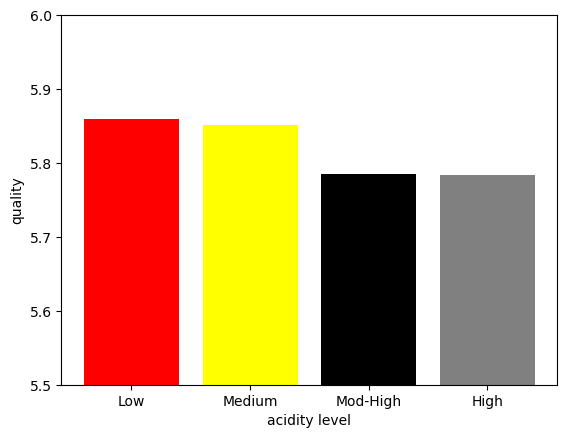

In [32]:
# Create a bar chart with proper labels
plt.bar([0,1,2,3],lev,tick_label=['Low','Medium','Mod-High','High'],color=['Red','Yellow','Black','grey'])
plt.xlabel('acidity level')
plt.ylim(5.5,6)
plt.ylabel('quality')